# LLM Zoomcamp
https://github.com/DataTalksClub/llm-zoomcamp/tree/main/02-open-source

In [ ]:
!pip install transformers accelerate bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [ ]:
!nvidia-smi

Sat Jul  6 18:22:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0              29W /  70W |  10977MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py

--2024-07-07 18:56:02--  https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3832 (3.7K) [text/plain]
Saving to: ‘minsearch.py’

minsearch.py        100%[===================>]   3.74K  --.-KB/s    in 0s      

2024-07-07 18:56:02 (64.8 MB/s) - ‘minsearch.py’ saved [3832/3832]



In [ ]:
from google.colab import userdata
import minsearch
import requests # to get JSON from docs_url
from transformers import T5Tokenizer, T5ForConditionalGeneration
#userdata.get('HF_TOKEN')

In [ ]:
# Get Q&A JSON file
docs_url = 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main/01-intro/documents.json?raw=1'
docs_response = requests.get(docs_url)
documents_raw = docs_response.json()

documents = []

for course in documents_raw:
    course_name = course['course']

    for doc in course['documents']:
        doc['course'] = course_name
        documents.append(doc)

index = minsearch.Index(
    text_fields=["question", "text", "section"],
    keyword_fields=["course"]
)

index.fit(documents)

## Google Flan-T5-XL
https://www.youtube.com/watch?v=a86iTyxnFE4&list=PL3MmuxUbc_hIB4fSqLy_0AfTjVLpgjV3R

https://huggingface.co/google/flan-t5-xl

https://github.com/DataTalksClub/llm-zoomcamp/blob/main/02-open-source/huggingface-flan-t5.ipynb


In [ ]:
# Download Flan-T5-XL model from HuggingFace
# https://huggingface.co/google/flan-t5-xl
# https://youtu.be/a86iTyxnFE4?t=183
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-xl")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xl", device_map="auto")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

ImportError: Using `low_cpu_mem_usage=True` or a `device_map` requires Accelerate: `pip install accelerate`

In [ ]:
def search(query):
    boost = {'question': 3.0, 'section': 0.5}

    results = index.search(
        query=query,
        filter_dict={'course': 'data-engineering-zoomcamp'},
        boost_dict=boost,
        num_results=5
    )

    return results

In [ ]:
def rag(query):
    search_results = search(query)
    prompt = build_prompt(query, search_results)
    answer = llm(prompt)
    return answer

In [ ]:
# https://youtu.be/a86iTyxnFE4?t=649
def build_prompt(query, search_results):
    prompt_template = """
You're a course teaching assistant. Answer the QUESTION based on the CONTEXT from the FAQ database.
Use only the facts from the CONTEXT when answering the QUESTION.

QUESTION: {question}

CONTEXT:
{context}
""".strip()

    context = ""

    for doc in search_results:
        context = context + f"section: {doc['section']}\nquestion: {doc['question']}\nanswer: {doc['text']}\n\n"

    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt

In [ ]:
# https://www.youtube.com/watch?v=a86iTyxnFE4&t=649s
# https://youtu.be/a86iTyxnFE4?t=836
def llm(prompt, generate_params=None):
    if generate_params is None:
        generate_params = {}

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(
        input_ids,
        max_length=generate_params.get("max_length", 100), # Set this to a higher value if you want longer responses
        num_beams=generate_params.get("num_beams", 5), # Typical values between 5 and 10
        do_sample=generate_params.get("do_sample", False), # True - use sampling methods
        temperature=generate_params.get("temperature", 1.0), # Typical values from 0.7 to 1.5 - higher value increase diversity
        top_k=generate_params.get("top_k", 50), # Limits the sampling pool to the top k tokens
        top_p=generate_params.get("top_p", 0.95), # uses cumulative probability to cut off the sampling pool
    )
    result = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return result

In [ ]:
input_txt = "translate English to Italian: How old are you?"
input_ids = tokenizer(input_txt, return_tensors='pt').input_ids.to('cuda')

# input text coverted into tokens based on Flan-T5-XL tokenizer
input_ids

NameError: name 'tokenizer' is not defined

In [ ]:
# Give a [tokenized] task to Flan-T5-XL model
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Quanto è il vostri età?


In [ ]:
# RAG using Flan-T5-XL as a LLM
rag("I just dicovered the course. Can I still join it?")

NameError: name 'rag' is not defined

## Microsoft Phi-3 Mini
https://youtu.be/8KH6AS2PqWk?list=PL3MmuxUbc_hIB4fSqLy_0AfTjVLpgjV3R

https://huggingface.co/docs/transformers/main/en/model_doc/phi3

https://github.com/DataTalksClub/llm-zoomcamp/blob/main/02-open-source/huggingface-phi3.ipynb

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

import os
os.environ['HF_HOME'] = '/run/cache/' # Change location where downloaded models from HuggingFace will be located
torch.random.manual_seed(0)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

config.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
!ls -la /run/cache/modules/transformers_modules/microsoft

total 12
drwxr-xr-x 3 root root 4096 Jul  6 22:55 .
drwxr-xr-x 3 root root 4096 Jul  6 22:55 ..
-rw-r--r-- 1 root root    0 Jul  6 22:55 __init__.py
drwxr-xr-x 3 root root 4096 Jul  6 22:55 Phi-3-mini-128k-instruct


In [ ]:
# Save the model
model.save_pretrained("./mistral-7b-model")
tokenizer.save_pretrained("./mistral-7b-tokenizer")

# Load the model
from transformers import AutoModelForCausalLM, AutoTokenizer
model_dir = "./mistral-7b-model"
tokenizer_dir = "./mistral-7b-tokenizer"

model = AutoModelForCausalLM.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_dir)

In [ ]:
# https://youtu.be/8KH6AS2PqWk?list=PL3MmuxUbc_hIB4fSqLy_0AfTjVLpgjV3R&t=338
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

In [ ]:
# For rag()
def build_prompt(query, search_results):
    prompt_template = """
You're a course teaching assistant. Answer the QUESTION based on the CONTEXT from the FAQ database.
Use only the facts from the CONTEXT when answering the QUESTION.

QUESTION: {question}

CONTEXT:
{context}
""".strip()

    context = ""

    for doc in search_results:
        context = context + f"section: {doc['section']}\nquestion: {doc['question']}\nanswer: {doc['text']}\n\n"

    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt

In [ ]:
# For rag()
def llm(prompt):
    messages = [
        {"role": "user", "content": prompt},
    ]

    generation_args = {
        "max_new_tokens": 500,
        "return_full_text": False,
        "temperature": 0.0,
        "do_sample": False,
    }

    output = pipe(messages, **generation_args)
    return output[0]['generated_text'].strip()

In [ ]:
# RAG using Phi-3 Mini as a LLM
rag("I just discovered the course. Can I still join it?")

##  Mistral-7B-v0.1
https://youtu.be/TdVEOzSoUCs?list=PL3MmuxUbc_hIB4fSqLy_0AfTjVLpgjV3R

https://huggingface.co/mistralai/Mistral-7B-v0.1

https://github.com/DataTalksClub/llm-zoomcamp/blob/main/02-open-source/huggingface-mistral-7b.ipynb

https://huggingface.co/docs/transformers/en/llm_tutorial

First, agree to share contact information to access the model.
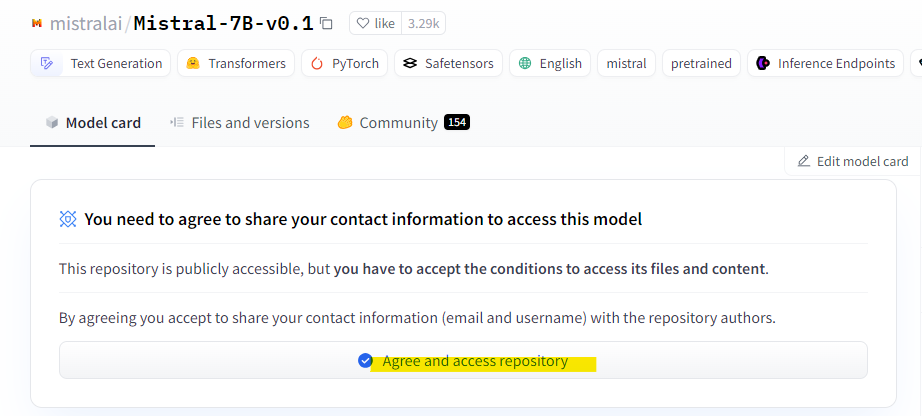

Then create User Access Token in HuggingFace and use this token to access the model:

In [ ]:
from huggingface_hub import login

In [ ]:
#login(token=os.environ['HF_TOKEN'])
login(token=userdata.get('HF_TOKEN')) # userdata.get('HF_TOKEN') - saved in Google Colab -> Secrets

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-v0.1", device_map="auto", load_in_4bit=True
)

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1", padding_side="left")

In [ ]:
#from transformers import pipeline
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

In [ ]:
def build_prompt(query, search_results):
    prompt_template = """
QUESTION: {question}

CONTEXT:
{context}

ANSWER:
""".strip()

    context = ""

    for doc in search_results:
        context = context + f"{doc['question']}\n{doc['text']}\n\n"

    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt

In [ ]:
def llm(prompt):
    response = generator(prompt, max_length=500, temperature=0.7, top_p=0.95, num_return_sequences=1)
    response_final = response[0]['generated_text']
    return response_final[len(prompt):].strip() # Mistral-7B-v0.1 gives also the initial prompt. Here it is removed.

In [ ]:
# RAG using Mistral-7B-v0.1 as a LLM
rag("I just discovered the course. Can I still join it?")

## Open source LLM models
https://youtu.be/GzPV_HTmCkc?list=PL3MmuxUbc_hIB4fSqLy_0AfTjVLpgjV3R

https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard

https://huggingface.co/spaces/optimum/llm-perf-leaderboard

## Ollama
_running LLM on CPU_

https://youtu.be/PVpBGs_iSjY?list=PL3MmuxUbc_hIB4fSqLy_0AfTjVLpgjV3R
